## XGBoost Classifier

In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mymldev.model.classifier import MXGBClassifier

In [5]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X_df = pd.DataFrame(X, columns=bc.feature_names)
y_df = pd.Series(y, name='target')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, 
                                                    stratify=y_df, random_state=1310)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [7]:
xgbc = MXGBClassifier()
xgbc.fit(X_train, y_train)

MXGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)

In [8]:
# Top 10 features
xgbc.get_feature_importance(normalized=False)

,IDV,Importance
0,worst area,60.0
1,area error,56.0
2,worst texture,54.0
3,mean texture,36.0
4,mean concave points,32.0
5,worst concave points,29.0
6,worst concavity,25.0
7,worst symmetry,25.0
8,worst smoothness,22.0
9,mean smoothness,15.0


In [9]:
xgbc_train_metric = xgbc.classification_metric(X_train, y_train)
xgbc_test_metric = xgbc.classification_metric(X_test, y_test)

In [10]:
xgbc_test_metric.gains_table_

,Decile,No. of Observations,Number of Targets,Cumulative Targets,% of Targets,Gain,Random Targets,Lift,Cumulative Lift
0,1,15,15,15,16.6667,16.6667,9,1.66667,1.66667
1,2,14,14,29,15.5556,32.2222,9,1.55556,3.22222
2,3,14,14,43,15.5556,47.7778,9,1.55556,4.77778
3,4,14,14,57,15.5556,63.3333,9,1.55556,6.33333
4,5,14,12,69,13.3333,76.6667,9,1.33333,7.66667
5,6,15,15,84,16.6667,93.3333,9,1.66667,9.33333
6,7,14,6,90,6.66667,100,9,0.666667,10
7,8,14,0,90,0,100,9,0,10
8,9,14,0,90,0,100,9,0,10
9,10,15,0,90,0,100,9,0,10


In [11]:
xgbc_test_metric.auc_, xgbc_test_metric.lift_score_

(0.9874213836477987, 1.6666666666666667)

In [12]:
xgbc_test_cfm_metric = xgbc_test_metric.confusion_matrix(0.4)

In [13]:
xgbc_test_metric.cfm

,threshold (0.4),0,1
0,0,48,5
1,1,1,89


In [14]:
print(f'Accuracy: {xgbc_test_cfm_metric.accuracy_}')
print(f'F1-score: {xgbc_test_cfm_metric.f1_score_}')
print(f'False Positives: {xgbc_test_cfm_metric.fp_}')
print(f'False Negatives: {xgbc_test_cfm_metric.fn_}')
print(f'True Positives: {xgbc_test_cfm_metric.tp_}')
print(f'True Negatives: {xgbc_test_cfm_metric.tn_}')
print(f'False Discovery Rate: {xgbc_test_cfm_metric.false_discovery_rate_}')
print(f'False Negative Rate: {xgbc_test_cfm_metric.false_negative_rate_}')
print(f'False Omission Rate: {xgbc_test_cfm_metric.false_omission_rate_}')
print(f'False Positive Rate: {xgbc_test_cfm_metric.false_positive_rate_}')
print(f'Negative Predictive Value: {xgbc_test_cfm_metric.negative_predictive_value_}')
print(f'Precision: {xgbc_test_cfm_metric.precision_}')
print(f'Recall: {xgbc_test_cfm_metric.recall_}')
print(f'Specificity: {xgbc_test_cfm_metric.specificity_}')

Accuracy: 95.8
F1-score: 96.74
False Positives: 5
False Negatives: 1
True Positives: 89
True Negatives: 48
False Discovery Rate: 5.32
False Negative Rate: 1.11
False Omission Rate: 2.04
False Positive Rate: 9.43
Negative Predictive Value: 97.96
Precision: 94.68
Recall: 98.89
Specificity: 90.57


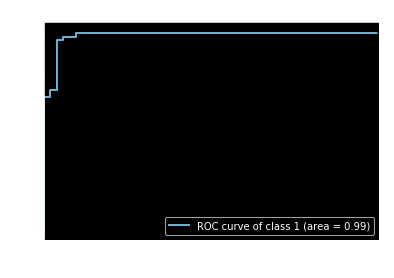

In [15]:
xgbc_test_metric.plot_roc_
plt.show()